# Task 1.1

In [2]:

import numpy as np
from numpy import linalg as LA
import keras
import pandas as pd
from keras.models import Sequential
import keras.backend as kb
import tensorflow as tf
%matplotlib notebook

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [3]:
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.464], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]] 


#Part 1 output data: VL (V) and Power out (W)
ydata = [[18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]] 


xarray= np.array(xdata)
yarray= np.array(ydata)
#print (xdata)
#print (xarray)
#print (ydata)
#print (yarray)

In [812]:
###Compute mean and standard deviation for xarray
xmean = np.mean(xarray, 0)
print('mean of the three inputs:',xmean)
#print(xmean[1])

x_std = np.std(xarray,0)
print('std deviation of the three inputs: ', x_std)

mean of the three inputs: [ 10.    800.      6.696]
std deviation of the three inputs:  [ 16.32993162 335.41019662   1.82242037]


In [813]:
###Obtaining the normalized data
x_normalized = (xarray - xmean)/x_std
print('Normalized data:', x_normalized)


Normalized data: [[-1.22474487e+00 -1.34164079e+00 -1.22474487e+00]
 [-1.22474487e+00 -4.47213595e-01 -1.22474487e+00]
 [-1.22474487e+00  4.47213595e-01 -1.22474487e+00]
 [-1.22474487e+00  1.34164079e+00 -1.22474487e+00]
 [ 0.00000000e+00 -1.34164079e+00 -1.22474487e+00]
 [ 0.00000000e+00 -4.47213595e-01 -1.22474487e+00]
 [ 0.00000000e+00  4.47213595e-01 -1.22474487e+00]
 [ 0.00000000e+00  1.34164079e+00 -1.22474487e+00]
 [ 1.22474487e+00 -1.34164079e+00 -1.22474487e+00]
 [ 1.22474487e+00 -4.47213595e-01 -1.22474487e+00]
 [ 1.22474487e+00  4.47213595e-01 -1.22474487e+00]
 [ 1.22474487e+00  1.34164079e+00 -1.22474487e+00]
 [-1.22474487e+00 -1.34164079e+00  4.87361991e-16]
 [-1.22474487e+00 -4.47213595e-01  4.87361991e-16]
 [-1.22474487e+00  4.47213595e-01  4.87361991e-16]
 [-1.22474487e+00  1.34164079e+00  4.87361991e-16]
 [ 0.00000000e+00 -1.34164079e+00  4.87361991e-16]
 [ 0.00000000e+00 -4.47213595e-01  4.87361991e-16]
 [ 0.00000000e+00  4.47213595e-01  4.87361991e-16]
 [ 0.00000000e

### Task b & c)

In [814]:
C = np.cov(x_normalized.T)  #transpose is matrix we want to work with - compute covariance matrix
print (C)

[[ 1.02857143e+00  6.34413157e-18 -1.26882631e-17]
 [ 6.34413157e-18  1.02857143e+00  0.00000000e+00]
 [-1.26882631e-17  0.00000000e+00  1.02857143e+00]]


In [815]:
w, v = LA.eig(C)  # get the eigenvalues w and the eigenvectors 
print ('Eigeivalues: ',w)
print (v)

Eigeivalues:  [1.02857143 1.02857143 1.02857143]
[[-0.99784305 -0.02527489 -0.01523038]
 [-0.01424037 -0.89463486  0.94398814]
 [ 0.06408166 -0.44608255 -0.32962772]]


### Task d)

<IPython.core.display.Javascript object>


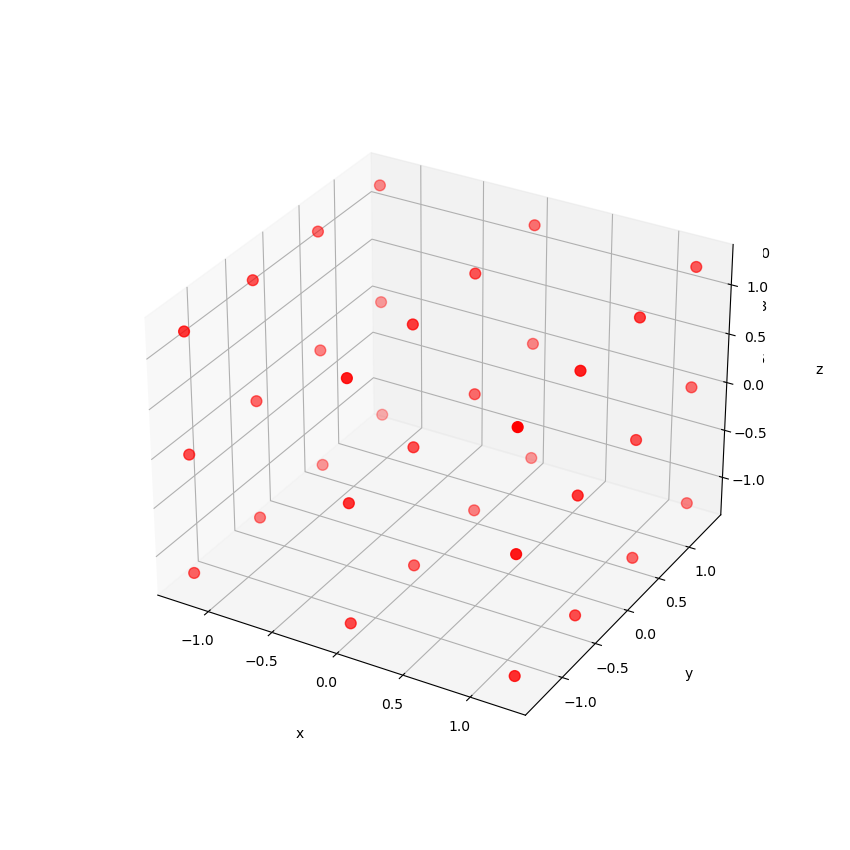

In [816]:
# libraries

#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure()

ax = fig.gca(projection='3d')
fig.set_size_inches(8.5, 8.5)

X = x_normalized
x=X[:,0]
y=X[:,1]
z=X[:,2]


ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='red', s=60)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()



# Task 1.2

### Task a) Normalizing data

In [817]:
x_median = np.median(xarray, 0)
T_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
ID_med = x_median[1]
RL_med = x_median[2]
print('median of each input:', x_median)
x_norm = xarray/x_median
print('normalized array: ', x_norm)

y_median = np.median(yarray, 0)
VL_med = y_median[0] ###Median for the first output: Panel output voltage to Load (V)
Power_med = y_median[1] ###Same for Panel power output (W)
print('Power median :', Power_med)

y_norm = yarray/y_median
print('normalized output array:', y_norm)

median of each input: [ 10.    800.      6.696]
normalized array:  [[-1.          0.4375      0.66666667]
 [-1.          0.8125      0.66666667]
 [-1.          1.1875      0.66666667]
 [-1.          1.5625      0.66666667]
 [ 1.          0.4375      0.66666667]
 [ 1.          0.8125      0.66666667]
 [ 1.          1.1875      0.66666667]
 [ 1.          1.5625      0.66666667]
 [ 3.          0.4375      0.66666667]
 [ 3.          0.8125      0.66666667]
 [ 3.          1.1875      0.66666667]
 [ 3.          1.5625      0.66666667]
 [-1.          0.4375      1.        ]
 [-1.          0.8125      1.        ]
 [-1.          1.1875      1.        ]
 [-1.          1.5625      1.        ]
 [ 1.          0.4375      1.        ]
 [ 1.          0.8125      1.        ]
 [ 1.          1.1875      1.        ]
 [ 1.          1.5625      1.        ]
 [ 3.          0.4375      1.        ]
 [ 3.          0.8125      1.        ]
 [ 3.          1.1875      1.        ]
 [ 3.          1.5625      1.       

### Task b)

In [820]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.33)

In [821]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(x_norm))
print(y_train)
print(x_train)

24
24
12
36
[[1.10775047 1.28671329]
 [0.96030246 0.72427572]
 [1.13799622 1.35364635]
 [0.99432892 0.77522478]
 [1.15689981 1.05094905]
 [0.88846881 1.24475524]
 [1.00189036 1.57442557]
 [1.08884688 0.93406593]
 [0.88846881 0.62137862]
 [1.00189036 1.04795205]
 [1.00189036 0.78521479]
 [1.06238185 1.18081918]
 [1.09640832 1.89210789]
 [0.99810964 1.04495504]
 [0.73345936 0.84615385]
 [0.97542533 0.996004  ]
 [1.13043478 1.003996  ]
 [1.06238185 1.77522478]
 [0.96786389 1.46753247]
 [0.84688091 0.75124875]
 [1.06238185 0.88611389]
 [0.93761815 0.92107892]
 [0.94517958 1.4035964 ]
 [1.02457467 0.82617383]]
[[ 3.          1.1875      1.        ]
 [-1.          0.8125      1.33333333]
 [ 3.          1.5625      1.        ]
 [-1.          1.1875      1.33333333]
 [ 3.          1.5625      1.33333333]
 [-1.          0.8125      0.66666667]
 [ 1.          1.1875      0.66666667]
 [ 3.          0.8125      1.33333333]
 [-1.          0.4375      1.33333333]
 [ 1.          0.8125      1.       

### Task c & d)

In [822]:
###DEFINE NEURAL NETWORK
from keras import backend as K

initializer = keras.initializers.RandomUniform(minval= -1, maxval=1)

model = keras.Sequential([
    keras.layers.Dense(6, activation = K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation = K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation = K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation = K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [826]:
rms = keras.optimizers.RMSprop(0.0030)
model.compile(loss='mean_absolute_error',optimizer=rms)

In [827]:
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 150, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_P1_2_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

#historyData = model.fit(x_train, y_train,epochs=800,callbacks=[es, tensorboard_cb], validation_data = (x_test, y_test))
historyData = model.fit(x_train, y_train,epochs=800,callbacks=[es, tensorboard_cb])
loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

""""model.save('./best_model')"""""

Epoch 1/800
1/1 [==============================] - 0s 44ms/step - loss: 0.1149
Epoch 2/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0607
Epoch 3/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0448
Epoch 4/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0401
Epoch 5/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0423
Epoch 6/800
1/1 [==============================] - 0s 5ms/step - loss: 0.0372
Epoch 7/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0346
Epoch 8/800
1/1 [==============================] - 0s 7ms/step - loss: 0.0305
Epoch 9/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0319
Epoch 10/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0334
Epoch 11/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 12/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0262
Epoch 13/800
1/1 [==============================] - 0s 5ms/s

1/1 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 207/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 208/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 209/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 210/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 211/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 212/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 213/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 214/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 215/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 216/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 217/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 218/800
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 411/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 412/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 413/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 414/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 415/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 416/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 417/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 418/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 419/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 420/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 421/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 422/800
1/1 [==============================] - 0

'"model.save(\'./best_model\')'

### Task e)

In [828]:
#Getting the predicted power by the model:
y_pred = []
for i in range(len(x_train)):
    xrow = [[x_train[i][0] , x_train[i][1] , x_train[i][2]]]
    out = model.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )


<IPython.core.display.Javascript object>


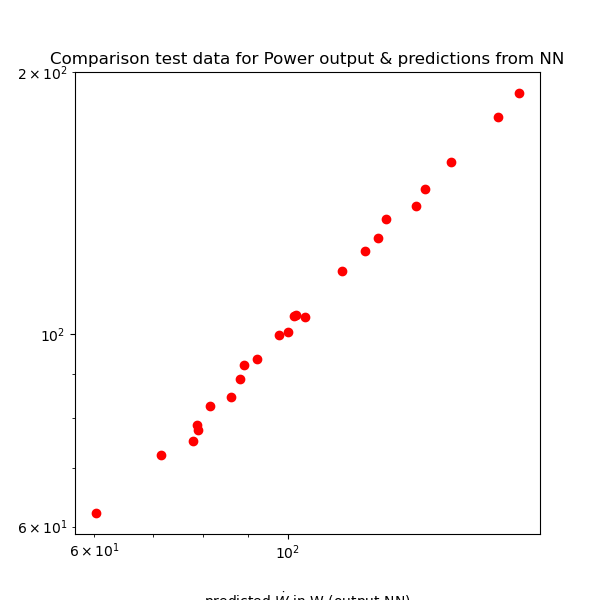

<IPython.core.display.Javascript object>


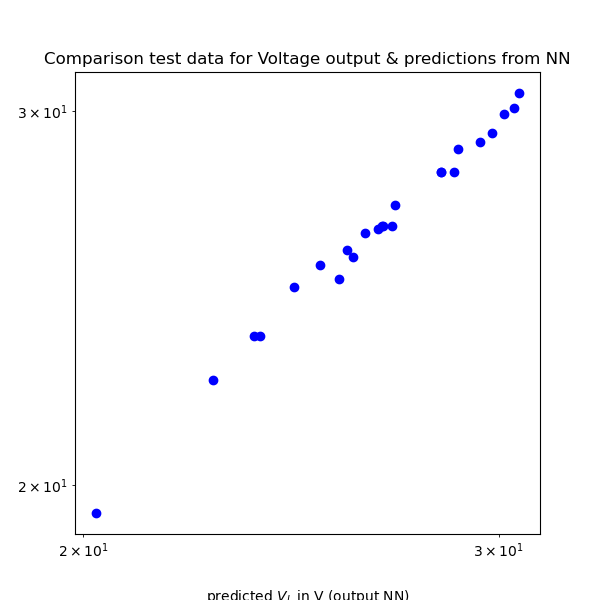

In [829]:
Voltage_data = [y_train[i][0] * VL_med for i in range(len(y_train))]
Voltage_pred = [y_pred[i][0] *VL_med for i in range(len(y_pred))]

Power_data_train = [y_train[i][1]*Power_med for i in range(len(y_train))]
Power_data_test = [y_test[i][1]*Power_med for i in range(len(y_test))]
Power_pred = [y_pred[i][1]*Power_med for i in range(len(y_pred))]
Power_pred2 = [out2[i][1]*Power_med for i in range(len(y_pred))]

Power_data_norm = [y_train[i][1] for i in range(len(y_train))]
Power_pred_norm = [y_pred[i][1] for i in range(len(y_pred))]
#print(alpha_data)

#Plotting with log-log scale
plt.figure(figsize=(6,6))
plt.scatter(Power_pred, Power_data_train, c='r', label='Power output')

plt.title('Comparison test data for Power output & predictions from NN')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"test data for $\dot{W}$")
plt.loglog()
plt.figure(figsize=(6,6))
plt.scatter(Voltage_pred, Voltage_data, c='b', label='Voltage output')
plt.title('Comparison test data for Voltage output & predictions from NN')
plt.xlabel(r"predicted $V_L$ in V (output NN)")
plt.ylabel(r"test data for $V_L$")
plt.loglog()
plt.show()

##### Mean Absolute Error for e)

In [830]:
from sklearn.metrics import mean_absolute_error as mae
P_mae_e = mae(Power_data_norm, Power_pred_norm)
print(P_mae_e)

0.0218750500020051


### Task f)

In [831]:
#Getting the predicted power by the model:
y_pred_test = []
for i in range(len(x_test)):
    xrow = [[x_test[i][0] , x_test[i][1] , x_test[i][2]]]
    out = model.predict(np.array(xrow))
    y_pred_test.append(out) 
y_pred_test = np.concatenate(y_pred_test, axis=0 )


<IPython.core.display.Javascript object>


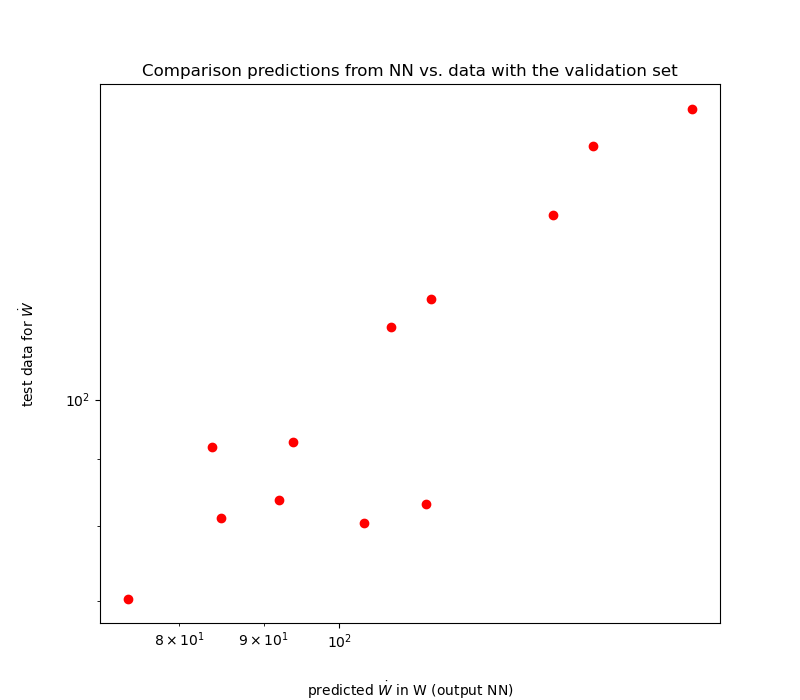

In [832]:
Power_data_test = [y_test[i][1]*Power_med for i in range(len(y_test))]
Power_pred_test = [y_pred_test[i][1]*Power_med for i in range(len(y_pred_test))]

Power_data_test_norm = [y_test[i][1] for i in range(len(y_test))]
Power_pred_test_norm = [y_pred_test[i][1] for i in range(len(y_pred_test))]
#print(alpha_data)

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(Power_pred_test, Power_data_test, c='r', label='Power output')
plt.title('Comparison predictions from NN vs. data with the validation set')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"test data for $\dot{W}$")
plt.loglog()
plt.show()

In [833]:
P_mae_f = mae(Power_data_test_norm, Power_pred_test_norm)
print(P_mae_f)

0.0932287400538152


### Task g)

In [834]:
#Part 1 input HI FLUX DATA: Air temp (degC), ID (W/sqm), load resistance (ohms)

xdata = [[-10.0, 1550, 4.464], 
  [-10.0, 1850, 4.464], 
  [10.0, 1550, 4.464], 
  [10.0, 1850, 4.464], 
  [30.0, 1550, 4.464], 
  [30.0, 1850, 4.464], 
  [-10.0, 1550, 6.696], 
  [-10.0, 1850, 6.696], 
  [10.0, 1550, 6.696], 
  [10.0, 1850, 6.696], 
  [30.0, 1550, 6.696], 
  [30.0, 1850, 6.696], 
  [-10.0, 1550, 8.928], 
  [-10.0, 1850, 8.928],   
  [10.0, 1550, 8.928], 
  [10.0, 1850, 8.928], 
  [30.0, 1550, 8.928], 
  [30.0, 1850, 8.928]]
#Part 1 output HI FLUX DATA: load voltage (V) and Power out (W)
ydata = [[26.1, 152.8], 
 [26.5, 157.4], 
 [27.9, 174.5], 
 [28.3, 179.9], 
 [29.6, 197.5], 
 [30.1, 203.88396644646863],  
 [26.9, 108.3334196813148], 
 [27.2, 111.25283762284167], 
 [28.8, 123.90621088656334], 
 [29.1, 127.3006573252854], 
 [30.6, 140.4799701696024], 
 [31.0, 144.39313467349314],  
 [27.3, 83.77924895974105], 
 [27.6, 85.91711375810277], 
 [29.2, 95.88391097375488], 
 [29.6, 98.3599961391009], 
 [31.1, 108.78119217392532], 
 [31.5, 111.62434462334976]]


xarray= np.array(xdata)
yarray= np.array(ydata)
print (xdata)
print (xarray.shape)
print (ydata)
print (yarray)

[[-10.0, 1550, 4.464], [-10.0, 1850, 4.464], [10.0, 1550, 4.464], [10.0, 1850, 4.464], [30.0, 1550, 4.464], [30.0, 1850, 4.464], [-10.0, 1550, 6.696], [-10.0, 1850, 6.696], [10.0, 1550, 6.696], [10.0, 1850, 6.696], [30.0, 1550, 6.696], [30.0, 1850, 6.696], [-10.0, 1550, 8.928], [-10.0, 1850, 8.928], [10.0, 1550, 8.928], [10.0, 1850, 8.928], [30.0, 1550, 8.928], [30.0, 1850, 8.928]]
(18, 3)
[[26.1, 152.8], [26.5, 157.4], [27.9, 174.5], [28.3, 179.9], [29.6, 197.5], [30.1, 203.88396644646863], [26.9, 108.3334196813148], [27.2, 111.25283762284167], [28.8, 123.90621088656334], [29.1, 127.3006573252854], [30.6, 140.4799701696024], [31.0, 144.39313467349314], [27.3, 83.77924895974105], [27.6, 85.91711375810277], [29.2, 95.88391097375488], [29.6, 98.3599961391009], [31.1, 108.78119217392532], [31.5, 111.62434462334976]]
[[ 26.1        152.8       ]
 [ 26.5        157.4       ]
 [ 27.9        174.5       ]
 [ 28.3        179.9       ]
 [ 29.6        197.5       ]
 [ 30.1        203.88396645]
 

In [835]:
x_median = np.median(xarray, 0)
T_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
ID_med = x_median[1]
RL_med = x_median[2]
print('median of each input:', x_median)
x_norm = xarray/x_median

y_median = np.median(yarray, 0)
VL_med = y_median[0] ###Median for the first output: Panel output voltage to Load (V)
Power_med = y_median[1] ###Same for Panel power output (W)

y_norm = yarray/y_median
print('median of each output:', y_median)

print('normalized input array: ', x_norm)

print('normalized output array:', y_norm)

median of each input: [  10.    1700.       6.696]
median of each output: [ 28.95       125.60343411]
normalized input array:  [[-1.          0.91176471  0.66666667]
 [-1.          1.08823529  0.66666667]
 [ 1.          0.91176471  0.66666667]
 [ 1.          1.08823529  0.66666667]
 [ 3.          0.91176471  0.66666667]
 [ 3.          1.08823529  0.66666667]
 [-1.          0.91176471  1.        ]
 [-1.          1.08823529  1.        ]
 [ 1.          0.91176471  1.        ]
 [ 1.          1.08823529  1.        ]
 [ 3.          0.91176471  1.        ]
 [ 3.          1.08823529  1.        ]
 [-1.          0.91176471  1.33333333]
 [-1.          1.08823529  1.33333333]
 [ 1.          0.91176471  1.33333333]
 [ 1.          1.08823529  1.33333333]
 [ 3.          0.91176471  1.33333333]
 [ 3.          1.08823529  1.33333333]]
normalized output array: [[0.9015544  1.21652725]
 [0.91537133 1.25315045]
 [0.96373057 1.38929322]
 [0.9775475  1.43228568]
 [1.0224525  1.57240924]
 [1.03972366 1.62323

In [836]:
#Getting the predicted power by the model:
y_pred = []
for i in range(len(x_norm)):
    xrow = [[x_norm[i][0] , x_norm[i][1] , x_norm[i][2]]]
    out = model.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )


<IPython.core.display.Javascript object>


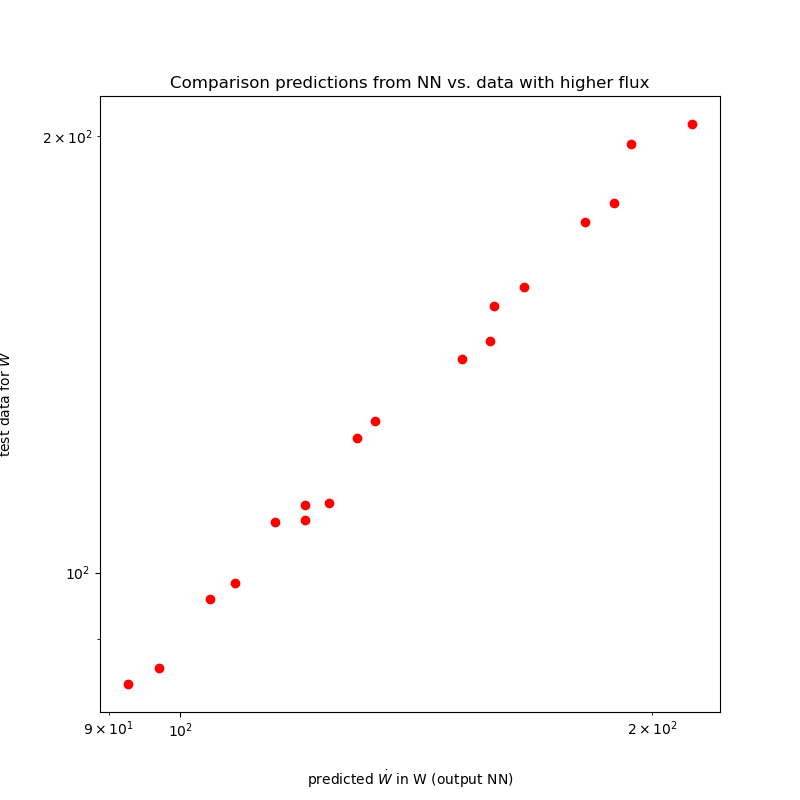

In [837]:
Power_data = [y_norm[i][1]*Power_med for i in range(len(y_norm))]
Power_pred = [y_pred[i][1]*Power_med for i in range(len(y_pred))]

Power_data_norm = [y_norm[i][1] for i in range(len(y_norm))]
Power_pred_norm = [y_pred[i][1] for i in range(len(y_pred))]
#print(alpha_data)

#Plotting with log-log scale
plt.figure(figsize=(8,8))
plt.scatter(Power_pred, Power_data, c='r', label='Power output')
plt.title('Comparison predictions from NN vs. data with higher flux')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"test data for $\dot{W}$")
plt.loglog()
plt.show()

In [838]:
P_mae_g = mae(Power_data_norm, Power_pred_norm)
print(P_mae_g)

0.0683739483935531


### Task h)

In [839]:
RL = np.linspace(4,8, 1000)
test = np.array(RL)

ID = np.linspace(500, 1800, 1000)
Tair = np.array([20 for i in range(len(RL))])

xdatah = np.vstack((Tair, ID, RL)).T
print(xdatah.shape)
print(xdatah)

(1000, 3)
[[  20.          500.            4.        ]
 [  20.          501.3013013     4.004004  ]
 [  20.          502.6026026     4.00800801]
 ...
 [  20.         1797.3973974     7.99199199]
 [  20.         1798.6986987     7.995996  ]
 [  20.         1800.            8.        ]]


In [840]:
x_median = np.median(xdatah, 0)
T_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
ID_med = x_median[1]
RL_med = x_median[2]
print('median of each input:', x_median)
x_norm = xdatah/x_median
print(len(x_norm))



median of each input: [  20. 1150.    6.]
1000


(1000, 2)
Z [[1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779206 0.93765932]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779206 0.93765932]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779206 0.93765932]
 ...
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779206 0.93765932]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779206 0.93765932]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779206 0.93765932]]
[[1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779212 0.93765926]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779212 0.93765926]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779212 0.93765926]
 ...
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779212 0.93765926]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779212 0.93765926]
 [1.12487626 1.1257571  1.12662649 ... 0.93792504 0.93779212 0.93765926]]


<IPython.core.display.Javascript object>


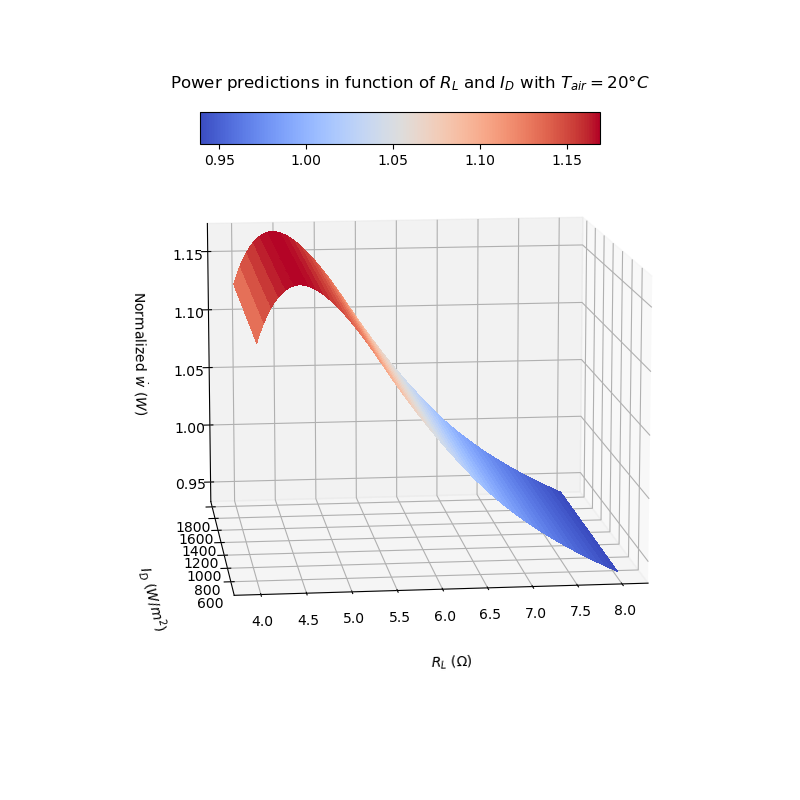

In [841]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from matplotlib import cm
import sys


#Getting the predicted power output by the model:
y_pred = []
xrow2 = []
for i in range(len(x_norm)):
    xrow = [[x_norm[i][0] , x_norm[i][1] , x_norm[i][2]]]
    out = model.predict(np.array(xrow))
    xrow2.append([x_norm[i][0] , x_norm[i][1] , x_norm[i][2]])
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )
out2 = model.predict(xrow2)
print(out2.shape)
Power_pred = [y_pred[i][1] for i in range(len(y_pred))]
Power_pred2 = [out2[i][1] for i in range(len(y_pred))]

X, Y = np.meshgrid(RL, ID)
Z = Power_pred + X - X
Z2 = Power_pred2 +X - X
print('Z',Z)
print(Z2)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth=0, antialiased = False)
#surf2 = ax.plot_surface(X, Y, Z2, cmap = cm.coolwarm, linewidth=0, antialiased = False)

cax = fig.add_axes([0.25, .82, 0.5, 0.04])
fig.colorbar(surf, orientation='horizontal', cax=cax)

ax.set_xlabel(r"$R_L$ ($\Omega$)")
ax.set_ylabel(r"$I_D$ ($W/m^2$)")
ax.set_zlabel(r"Normalized $\dot{w}$ ($W$)")
ax.set_title(r"Power predictions in function of $R_L$ and $I_D$ with $T_{air} = 20 °C$")
rcParams['axes.labelpad'] = 20

ax.azim = -130
ax.dist=10
ax.elev=10


plt.show()

## Task 1.3

### Task a)

### Task b)

In [845]:
###DEFINE NEURAL NETWORK
from keras import backend as K

initializer = keras.initializers.RandomUniform(minval= -1, maxval=1)

model2 = keras.Sequential([
    keras.layers.Dense(6, activation = K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation = K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(12, activation = K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation = K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation = K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [848]:
rms = keras.optimizers.RMSprop(0.0030)
model2.compile(loss='mean_absolute_error',optimizer=rms)

In [849]:
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 200, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_P1_3_train_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

#historyData = model2.fit(x_train, y_train, epochs=800,callbacks=[es, tensorboard_cb], validation_data =(x_test, y_test))
historyData = model2.fit(x_train, y_train,epochs=800,callbacks=[es, tensorboard_cb])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

""""model.save('./best_model')"""""

Epoch 1/800
1/1 [==============================] - 0s 43ms/step - loss: 0.1394
Epoch 2/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0949
Epoch 3/800
1/1 [==============================] - 0s 7ms/step - loss: 0.0853
Epoch 4/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0820
Epoch 5/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0785
Epoch 6/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 7/800
1/1 [==============================] - 0s 8ms/step - loss: 0.0779
Epoch 8/800
1/1 [==============================] - 0s 7ms/step - loss: 0.0736
Epoch 9/800
1/1 [==============================] - 0s 5ms/step - loss: 0.0665
Epoch 10/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0718
Epoch 11/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 12/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0645
Epoch 13/800
1/1 [==============================] - 0s 3ms/s

1/1 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 207/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 208/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 209/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0434
Epoch 210/800
1/1 [==============================] - 0s 5ms/step - loss: 0.0338
Epoch 211/800
1/1 [==============================] - 0s 8ms/step - loss: 0.0356
Epoch 212/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0376
Epoch 213/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 214/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 215/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0410
Epoch 216/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 217/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0413
Epoch 218/800
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0360
Epoch 411/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 412/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 413/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 414/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 415/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 416/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 417/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0383
Epoch 418/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 419/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 420/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 421/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 422/800
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 615/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 616/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 617/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 618/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 619/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0190
Epoch 620/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 621/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 622/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 623/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 624/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 625/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 626/800
1/1 [==============================] - 0

'"model.save(\'./best_model\')'

In [850]:
#Getting the predicted power by the model:
y_pred = []
for i in range(len(x_train)):
    xrow = [[x_train[i][0] , x_train[i][1] , x_train[i][2]]]
    out = model2.predict(np.array(xrow))
    y_pred.append(out) 

y_pred = np.concatenate(y_pred, axis=0 )


<IPython.core.display.Javascript object>


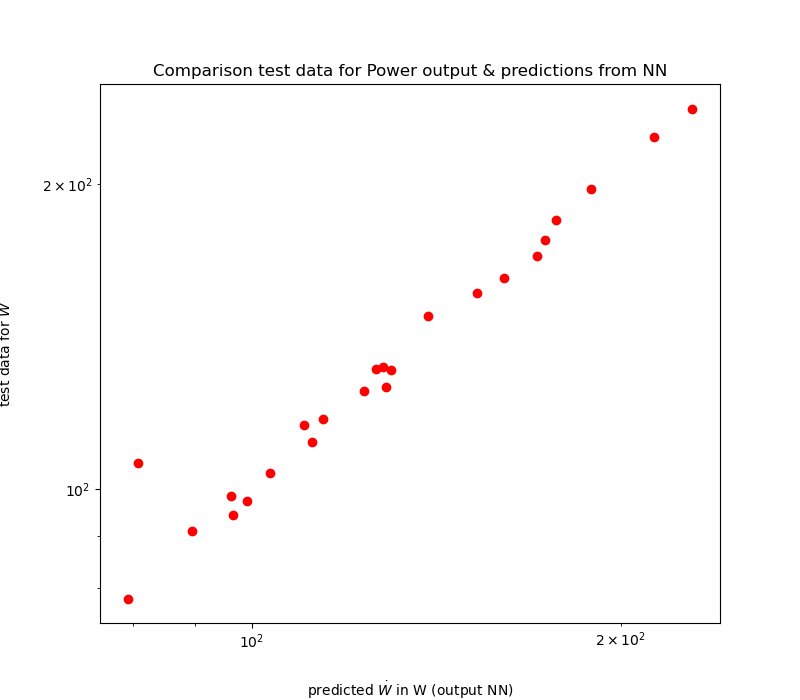

In [851]:
Voltage_data = [y_train[i][0] * VL_med for i in range(len(y_train))]
Voltage_pred = [y_pred[i][0] *VL_med for i in range(len(y_pred))]

Power_data_train = [y_train[i][1]*Power_med for i in range(len(y_train))]
Power_data_test = [y_test[i][1]*Power_med for i in range(len(y_test))]
Power_pred = [y_pred[i][1]*Power_med for i in range(len(y_pred))]

Power_data_norm = [y_train[i][1] for i in range(len(y_train))]
Power_pred_norm = [y_pred[i][1] for i in range(len(y_pred))]
#print(alpha_data)

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(Power_pred, Power_data_train, c='r', label='Power output')
plt.title('Comparison test data for Power output & predictions from NN')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"test data for $\dot{W}$")
plt.loglog()
plt.show()

In [852]:
P_mae_e = mae(Power_data_norm, Power_pred_norm)
print(P_mae_e)

0.03683853978331476


### Task f)

In [853]:
#Getting the predicted power by the model:
y_pred_test = []
for i in range(len(x_test)):
    xrow = [[x_test[i][0] , x_test[i][1] , x_test[i][2]]]
    out = model2.predict(np.array(xrow))
    y_pred_test.append(out) 
y_pred_test = np.concatenate(y_pred_test, axis=0 )


<IPython.core.display.Javascript object>


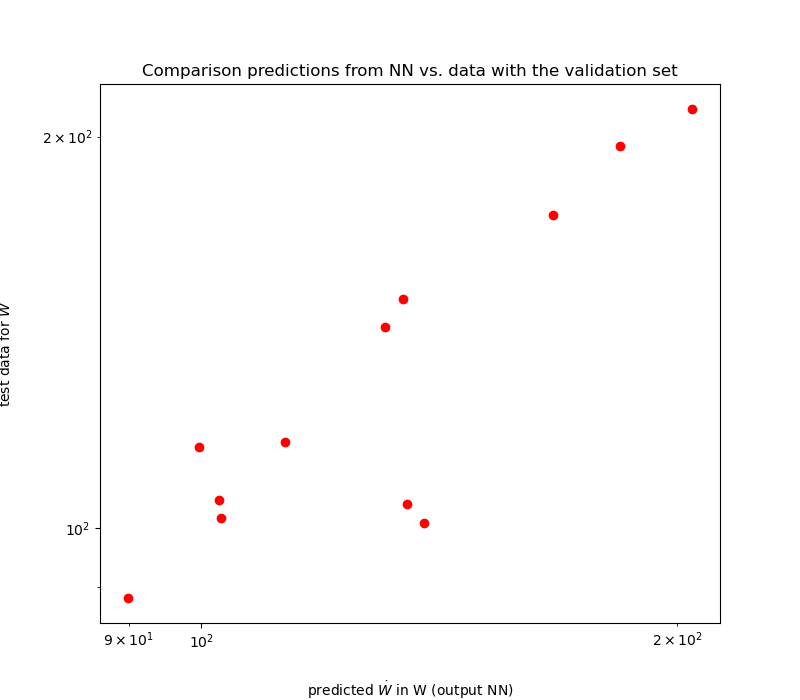

In [854]:
Power_data_test = [y_test[i][1]*Power_med for i in range(len(y_test))]
Power_pred_test = [y_pred_test[i][1]*Power_med for i in range(len(y_pred_test))]

Power_data_test_norm = [y_test[i][1] for i in range(len(y_test))]
Power_pred_test_norm = [y_pred_test[i][1] for i in range(len(y_pred_test))]
#print(alpha_data)

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(Power_pred_test, Power_data_test, c='r', label='Power output')
plt.title('Comparison predictions from NN vs. data with the validation set')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"test data for $\dot{W}$")
plt.loglog()
plt.show()

In [855]:
P_mae_f = mae(Power_data_test_norm, Power_pred_test_norm)
print(P_mae_f)

0.09722479970960114


### Task g) 

In [856]:
#Part 1 input HI FLUX DATA: Air temp (degC), ID (W/sqm), load resistance (ohms)

xdata = [[-10.0, 1550, 4.464], 
  [-10.0, 1850, 4.464], 
  [10.0, 1550, 4.464], 
  [10.0, 1850, 4.464], 
  [30.0, 1550, 4.464], 
  [30.0, 1850, 4.464], 
  [-10.0, 1550, 6.696], 
  [-10.0, 1850, 6.696], 
  [10.0, 1550, 6.696], 
  [10.0, 1850, 6.696], 
  [30.0, 1550, 6.696], 
  [30.0, 1850, 6.696], 
  [-10.0, 1550, 8.928], 
  [-10.0, 1850, 8.928],   
  [10.0, 1550, 8.928], 
  [10.0, 1850, 8.928], 
  [30.0, 1550, 8.928], 
  [30.0, 1850, 8.928]]
#Part 1 output HI FLUX DATA: load voltage (V) and Power out (W)
ydata = [[26.1, 152.8], 
 [26.5, 157.4], 
 [27.9, 174.5], 
 [28.3, 179.9], 
 [29.6, 197.5], 
 [30.1, 203.88396644646863],  
 [26.9, 108.3334196813148], 
 [27.2, 111.25283762284167], 
 [28.8, 123.90621088656334], 
 [29.1, 127.3006573252854], 
 [30.6, 140.4799701696024], 
 [31.0, 144.39313467349314],  
 [27.3, 83.77924895974105], 
 [27.6, 85.91711375810277], 
 [29.2, 95.88391097375488], 
 [29.6, 98.3599961391009], 
 [31.1, 108.78119217392532], 
 [31.5, 111.62434462334976]]


xarray= np.array(xdata)
yarray= np.array(ydata)
print (xdata)
print (xarray.shape)
print (ydata)
print (yarray)

[[-10.0, 1550, 4.464], [-10.0, 1850, 4.464], [10.0, 1550, 4.464], [10.0, 1850, 4.464], [30.0, 1550, 4.464], [30.0, 1850, 4.464], [-10.0, 1550, 6.696], [-10.0, 1850, 6.696], [10.0, 1550, 6.696], [10.0, 1850, 6.696], [30.0, 1550, 6.696], [30.0, 1850, 6.696], [-10.0, 1550, 8.928], [-10.0, 1850, 8.928], [10.0, 1550, 8.928], [10.0, 1850, 8.928], [30.0, 1550, 8.928], [30.0, 1850, 8.928]]
(18, 3)
[[26.1, 152.8], [26.5, 157.4], [27.9, 174.5], [28.3, 179.9], [29.6, 197.5], [30.1, 203.88396644646863], [26.9, 108.3334196813148], [27.2, 111.25283762284167], [28.8, 123.90621088656334], [29.1, 127.3006573252854], [30.6, 140.4799701696024], [31.0, 144.39313467349314], [27.3, 83.77924895974105], [27.6, 85.91711375810277], [29.2, 95.88391097375488], [29.6, 98.3599961391009], [31.1, 108.78119217392532], [31.5, 111.62434462334976]]
[[ 26.1        152.8       ]
 [ 26.5        157.4       ]
 [ 27.9        174.5       ]
 [ 28.3        179.9       ]
 [ 29.6        197.5       ]
 [ 30.1        203.88396645]
 

In [857]:
x_median = np.median(xarray, 0)
T_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
ID_med = x_median[1]
RL_med = x_median[2]
print('median of each input:', x_median)
x_norm = xarray/x_median

y_median = np.median(yarray, 0)
VL_med = y_median[0] ###Median for the first output: Panel output voltage to Load (V)
Power_med = y_median[1] ###Same for Panel power output (W)

y_norm = yarray/y_median
print('median of each output:', y_median)

print('normalized input array: ', x_norm)

print('normalized output array:', y_norm)

median of each input: [  10.    1700.       6.696]
median of each output: [ 28.95       125.60343411]
normalized input array:  [[-1.          0.91176471  0.66666667]
 [-1.          1.08823529  0.66666667]
 [ 1.          0.91176471  0.66666667]
 [ 1.          1.08823529  0.66666667]
 [ 3.          0.91176471  0.66666667]
 [ 3.          1.08823529  0.66666667]
 [-1.          0.91176471  1.        ]
 [-1.          1.08823529  1.        ]
 [ 1.          0.91176471  1.        ]
 [ 1.          1.08823529  1.        ]
 [ 3.          0.91176471  1.        ]
 [ 3.          1.08823529  1.        ]
 [-1.          0.91176471  1.33333333]
 [-1.          1.08823529  1.33333333]
 [ 1.          0.91176471  1.33333333]
 [ 1.          1.08823529  1.33333333]
 [ 3.          0.91176471  1.33333333]
 [ 3.          1.08823529  1.33333333]]
normalized output array: [[0.9015544  1.21652725]
 [0.91537133 1.25315045]
 [0.96373057 1.38929322]
 [0.9775475  1.43228568]
 [1.0224525  1.57240924]
 [1.03972366 1.62323

In [858]:
#Getting the predicted power by the model:
y_pred = []
for i in range(len(x_norm)):
    xrow = [[x_norm[i][0] , x_norm[i][1] , x_norm[i][2]]]
    out = model2.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )


<IPython.core.display.Javascript object>


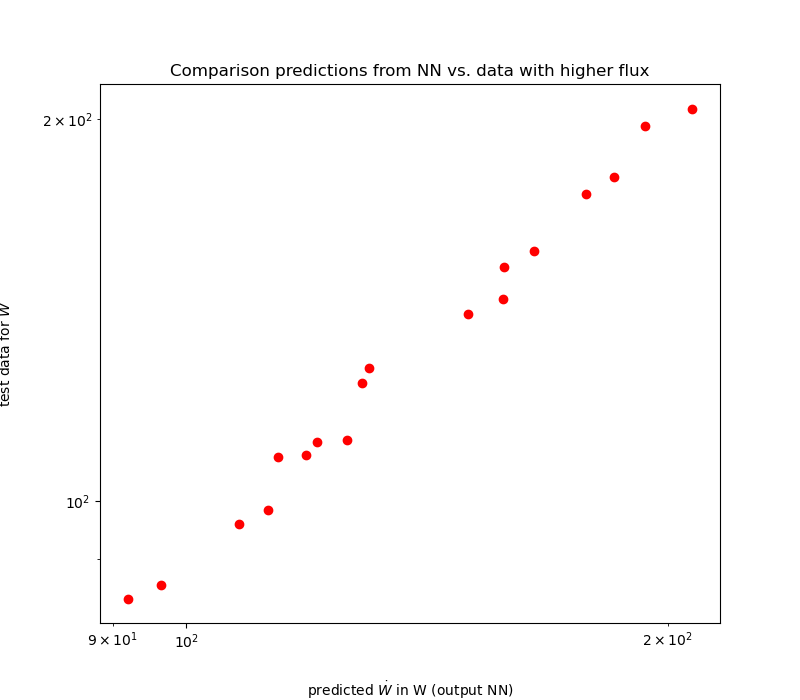

In [859]:
Power_data = [y_norm[i][1]*Power_med for i in range(len(y_norm))]
Power_pred = [y_pred[i][1]*Power_med for i in range(len(y_pred))]

Power_data_norm = [y_norm[i][1] for i in range(len(y_norm))]
Power_pred_norm = [y_pred[i][1] for i in range(len(y_pred))]
#print(alpha_data)

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(Power_pred, Power_data, c='r', label='Power output')
plt.title('Comparison predictions from NN vs. data with higher flux')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"test data for $\dot{W}$")
plt.loglog()
plt.show()

In [860]:
P_mae_g = mae(Power_data_norm, Power_pred_norm)
print(P_mae_g)

0.06358338070408132


### Task h)

In [861]:
RL = np.linspace(4,8, 1000)
test = np.array(RL)

ID = np.linspace(500, 1800, 1000)
Tair = np.array([20 for i in range(len(RL))])

xdatah = np.vstack((Tair, ID, RL)).T
print(xdatah.shape)
print(xdatah)

(1000, 3)
[[  20.          500.            4.        ]
 [  20.          501.3013013     4.004004  ]
 [  20.          502.6026026     4.00800801]
 ...
 [  20.         1797.3973974     7.99199199]
 [  20.         1798.6986987     7.995996  ]
 [  20.         1800.            8.        ]]


In [862]:
x_median = np.median(xdatah, 0)
T_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
ID_med = x_median[1]
RL_med = x_median[2]
print('median of each input:', x_median)
x_norm = xdatah/x_median



median of each input: [  20. 1150.    6.]


<IPython.core.display.Javascript object>


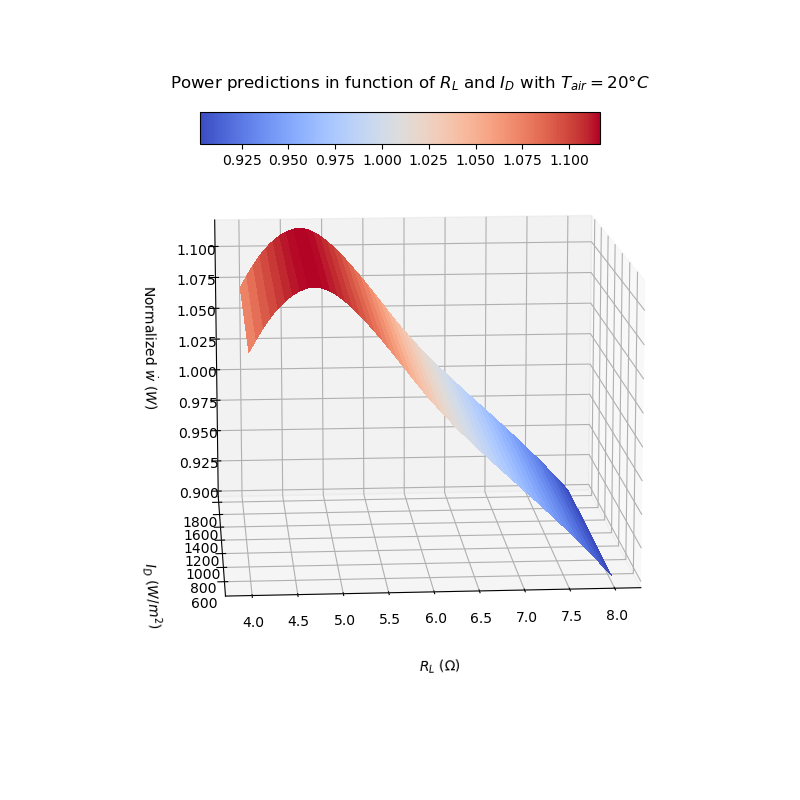

In [864]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from matplotlib import cm
import sys


#Getting the predicted power output by the model:
y_pred = []
for i in range(len(x_norm)):
    xrow = [[x_norm[i][0] , x_norm[i][1] , x_norm[i][2]]]
    out = model2.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )
Power_pred = [y_pred[i][1] for i in range(len(y_pred))]


X, Y = np.meshgrid(RL, ID)
Z = Power_pred + X + Y - X - Y

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth=0, antialiased = False)

cax = fig.add_axes([0.25, .82, 0.5, 0.04])
fig.colorbar(surf, orientation='horizontal', cax=cax)

ax.set_xlabel(r"$R_L$ ($\Omega$)")
ax.set_ylabel(r"$I_D$ ($W/m^2$)")
ax.set_zlabel(r"Normalized $\dot{w}$ ($W$)")
ax.set_title(r"Power predictions in function of $R_L$ and $I_D$ with $T_{air} = 20 °C$")
rcParams['axes.labelpad'] = 20

ax.azim = -130
ax.dist=10
ax.elev=10


plt.show()

# Part 2

### Task 2.1

In [684]:
import math, numpy
#Part 2 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
# - split into a training set and a small (~10) randomly selected validation set

xdata = [[10.0, 200.0, 24.3], 
 [10.0, 200.0, 51.8], 
 [10.0, 200.0, 96.2],
 [10.0, 200.0, 133.2],
 [10.0, 200.0, 170.1], 
 [10.0, 500.0, 7.0], 
 [10.0, 500.0, 21.2], 
 [10.0, 500.0, 43.2], 
 [10.0, 500.0, 61.2],
 [10.0, 500.0, 79.1], 
 [10.0, 700.0, 4.9], 
 [10.0, 700.0, 14.3], 
 [10.0, 700.0, 29.7],
 [10.0, 700.0, 42.9],
 [10.0, 700.0, 55.3], 
 [10.0, 1000.0, 3.92], 
 [10.0, 1000.0, 11.7], 
 [10.0, 1000.0, 25.2],
 [10.0, 1000.0, 33.4],
 [10.0, 1000.0, 41.6],
 [18.1, 500.0, 7.0], 
 [18.5, 500.0, 21.2], 
 [19.0, 500.0, 43.2], 
 [18.6, 500.0, 61.2],
 [18.8, 500.0, 79.1], 
 [2.1, 1000.0, 3.92], 
 [2.0, 1000.0, 11.7], 
 [1.9, 1000.0, 25.2],
 [2.3, 1000.0, 33.4],
 [2.4, 1000.0, 41.6],
 [0.5, 700.0, 4.9], 
 [0.7, 700.0, 14.3], 
 [1.0, 700.0, 29.7],
 [0.8, 700.0, 42.9],
 [0.2, 700.0, 55.3], 
 [15.2, 200.0, 24.3], 
 [15.4, 200.0, 51.8], 
 [21.2, 1000.0, 3.92], 
 [19.4, 1000.0, 11.7], 
 [19.2, 1000.0, 25.2]]



#Part 2 output data: Mode providing maximum power outp, VL (V) and Power out (W) 
ydata = [[1.0, 46.1, 87.1], 
 [2.0, 92.1, 163.9], 
 [3.0, 110.6, 127.2], 
 [3.0, 147.5, 163.5], 
 [3.0, 184.3, 199.7], 
 [1.0, 48.4, 335.3], 
 [2.0, 96.9, 442.9], 
 [3.0, 128.7, 383.6],
 [3.0, 161.3, 429.2],
 [3.0, 193.8, 474.8], 
 [1.0, 49.3, 496.1], 
 [2.0, 98.6, 680.0], 
 [3.0, 124.1, 518.9], 
 [3.0, 160.7, 611.2],
 [3.0, 197.2, 703.4], 
 [1.0, 50.8, 659.0], 
 [2.0, 101.65, 883.1], 
 [3.0, 148.7, 877.2], 
 [3.0, 176.0, 935.4],
 [3.0, 203.3, 993.5],
 [1.0, 47.6, 327.0], 
 [2.0, 96.1, 432.3], 
 [3.0, 127.9, 374.4],
 [3.0, 160.5, 418.9],
 [3.0, 193.0, 463.4], 
 [1.0, 50.0, 674.7], 
 [2.0, 100.9, 904.3], 
 [3.0, 147.9, 898.3], 
 [3.0, 175.2, 957.8],
 [3.0, 202.4, 1017.3],
 [1.0, 50.3, 511.0], 
 [2.0, 100.6, 700.4], 
 [3.0, 125.1, 534.5], 
 [3.0, 161.7, 629.5],
 [3.0, 198.2, 724.5], 
 [1.0, 45.6, 85.8], 
 [2.0, 91.5, 161.4], 
 [1.0, 49.8, 639.2], 
 [2.0, 100.6, 856.6], 
 [3.0, 147.7, 850.9] ]

xarray= numpy.array(xdata)
yarray= numpy.array(ydata)


### a)

In [685]:
x_median = np.median(xarray, 0)
T_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
ID_med = x_median[1]
RL_med = x_median[2]
print('median of each input:', x_median)
x_norm = xdata/x_median
#print('Normalized data:', x_norm)

y_median = np.median(ydata, 0)
print('median of each output:', y_median)

M_med = y_median[0] ###Median for the first input: Outside air Temperature Tair
VL_med = y_median[1]
W_med = y_median[2]
y_norm = ydata/y_median
#print('Normalized output data:', y_norm)


median of each input: [ 10.  700.   29.7]
median of each output: [  3.  124.6 526.7]


### b)

In [686]:
#####Dividing data set into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.25)
print('Len of the entire set:',len(x_norm))

print('Len of training set:',len(x_train))
print('Len of validation set:',len(x_test))
print(len(y_train))
print(len(y_test))

Len of the entire set: 40
Len of training set: 30
Len of validation set: 10
30
10


In [364]:
'''>>>>> start CodeP3.1.2
    V.P. Carey ME249, Spring 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [443]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
initializer = keras.initializers.RandomUniform(minval= -1, maxval=1)

model3 = keras.Sequential([
    keras.layers.Dense(16, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(32, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(3,  kernel_initializer=initializer)
  ])
model3.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 16)                64        
_________________________________________________________________
dense_121 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_122 (Dense)            (None, 3)                 99        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [448]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.0030)
model3.compile(loss='mean_absolute_error',optimizer=rms)


In [450]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 150, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_P2_1_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

#historyData = model3.fit(x_train, y_train,epochs=800,callbacks=[es, tensorboard_cb], validation_data = (x_test, y_test))
historyData = model3.fit(x_train, y_train,epochs=800,callbacks=[es, tensorboard_cb])
loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

#model.save('./best_model')

Epoch 1/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 2/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 3/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 4/800
1/1 [==============================] - 0s 1000us/step - loss: 0.0316
Epoch 5/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 6/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 7/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 8/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 9/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 10/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 11/800
1/1 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 12/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 13/800
1/1 [==============================] - 0s 2ms

1/1 [==============================] - 0s 998us/step - loss: 0.0267
Epoch 207/800
1/1 [==============================] - 0s 998us/step - loss: 0.0300
Epoch 208/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 209/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 210/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 211/800
1/1 [==============================] - 0s 9ms/step - loss: 0.0289
Epoch 212/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 213/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 214/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 215/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 216/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 217/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 218/800
1/1 [==============================]

1/1 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 411/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 412/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 413/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 414/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 415/800
1/1 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 416/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 417/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 418/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 419/800
1/1 [==============================] - 0s 999us/step - loss: 0.0256
Epoch 420/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 421/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 422/800
1/1 [==============================] -

1/1 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 615/800
1/1 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 616/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 617/800
1/1 [==============================] - 0s 1000us/step - loss: 0.0203
Epoch 618/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 619/800
1/1 [==============================] - 0s 1000us/step - loss: 0.0240
Epoch 620/800
1/1 [==============================] - 0s 998us/step - loss: 0.0222
Epoch 621/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 622/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 623/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 624/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 625/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 626/800
1/1 [===========================

In [ ]:
# This line of code can be used to reconstruct the saved model.

#recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.

### e)

In [489]:
#Getting the predicted power by the model:
y_pred = []
xrow2 = []
for i in range(len(x_train)):
    xrow = [[x_train[i][0] , x_train[i][1] , x_train[i][2]]]
    xrow2.append([[x_train[i][0] , x_train[i][1] , x_train[i][2]]])
    out = model3.predict(np.array(xrow))
    y_pred.append(out) 
print(len(np.array(xrow2)))
out2 = model3.predict(xrow2)
y_pred = np.concatenate(y_pred, axis=0 )

30


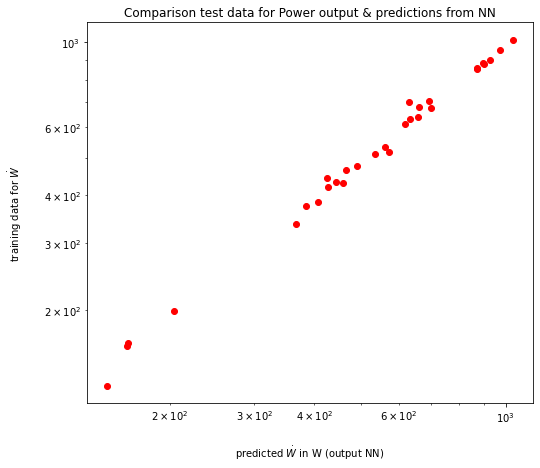

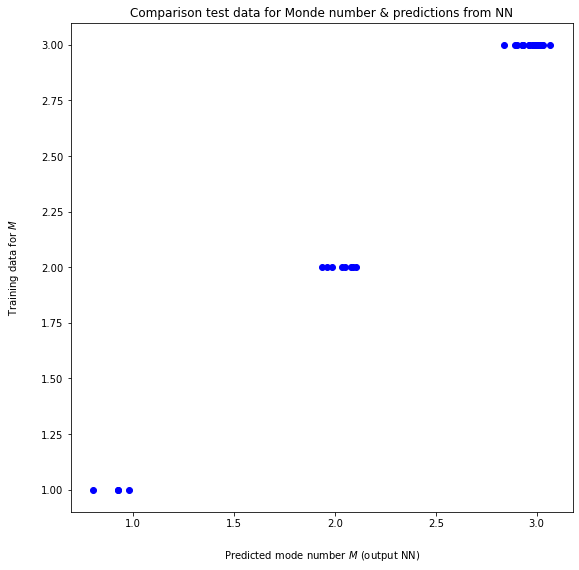

In [490]:
M_data_train = [y_train[i][0] * M_med for i in range(len(y_train))]
M_pred = [y_pred[i][0] *M_med for i in range(len(y_pred))]

M_data_train_norm = [y_train[i][0] for i in range(len(y_train))]
M_pred_norm = [y_pred[i][0]  for i in range(len(y_pred))]

W_data_train = [y_train[i][2]*W_med for i in range(len(y_train))]
W_data_test = [y_test[i][2]*W_med for i in range(len(y_test))]
W_pred = [y_pred[i][2]*W_med for i in range(len(y_pred))]

W_data_train_norm = [y_train[i][2] for i in range(len(y_train))]
W_pred_norm = [y_pred[i][2] for i in range(len(y_pred))]

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(W_pred, W_data_train, c='r', label='Power output')
plt.title('Comparison test data for Power output & predictions from NN')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"training data for $\dot{W}$")
plt.loglog()
plt.show()
plt.figure(figsize=(9,9))
plt.scatter(M_pred, M_data_train, c='b', label='Mode number')
plt.title('Comparison test data for Monde number & predictions from NN')
plt.xlabel(r"Predicted mode number $M$ (output NN)")
plt.ylabel(r"Training data for $M$")
#plt.loglog()
plt.show()

In [491]:
P_mae_e = mae(W_data_train_norm, W_pred_norm)
M_mae_e = mae(M_data_train_norm, M_pred_norm)

print('MAE for Power predictions =', P_mae_e)
print('MAE for M predictions =', M_mae_e)

MAE for Power predictions = 0.03606012567267622
MAE for M predictions = 0.01899420718352


### f)

In [471]:
#Getting the predicted power by the model:
y_pred = []
xrow2 = []
for i in range(len(x_test)):
    xrow = [[x_test[i][0] , x_test[i][1] , x_test[i][2]]]
    xrow2.append([[x_test[i][0] , x_test[i][1] , x_test[i][2]]])
    out = model3.predict(np.array(xrow))
    y_pred.append(out) 
print(len(np.array(xrow2)))
out2 = model3.predict(xrow2)
y_pred = np.concatenate(y_pred, axis=0 )

10


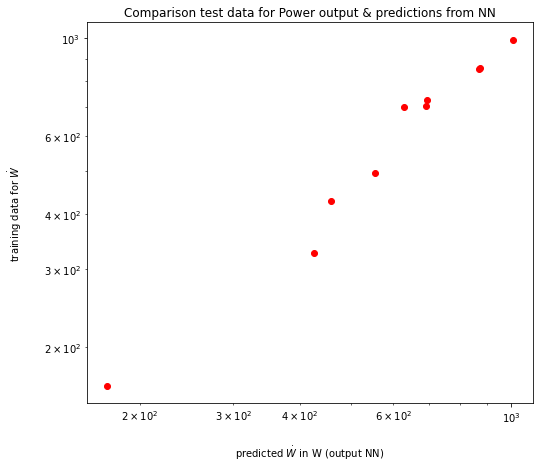

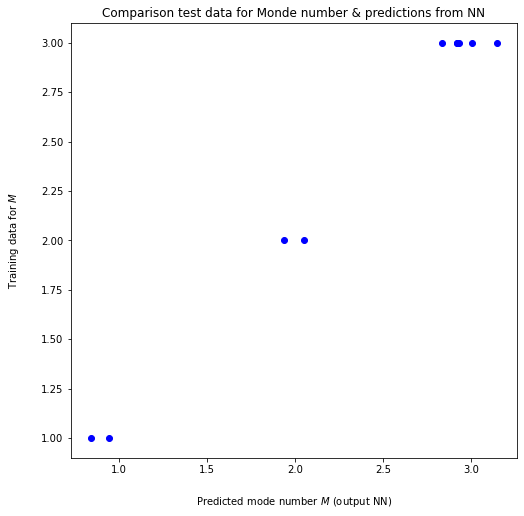

In [476]:
M_data_test = [y_test[i][0] * M_med for i in range(len(y_test))]
M_pred = [y_pred[i][0] *M_med for i in range(len(y_pred))]

M_data_test_norm = [y_test[i][0] for i in range(len(y_test))]
M_pred_norm = [y_pred[i][0]  for i in range(len(y_pred))]

W_data_test = [y_test[i][2]*W_med for i in range(len(y_test))]
W_pred = [y_pred[i][2]*W_med for i in range(len(y_pred))]

W_data_test_norm = [y_test[i][2] for i in range(len(y_test))]
W_pred_norm = [y_pred[i][2] for i in range(len(y_pred))]

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(W_pred, W_data_test, c='r', label='Power output')
plt.title('Comparison test data for Power output & predictions from NN')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"training data for $\dot{W}$")
plt.loglog()
plt.show()
plt.figure(figsize=(8,8))
plt.scatter(M_pred, M_data_test, c='b', label='Mode number')
plt.title('Comparison test data for Monde number & predictions from NN')
plt.xlabel(r"Predicted mode number $M$ (output NN)")
plt.ylabel(r"Training data for $M$")
#plt.loglog()
plt.show()

In [477]:
P_mae_f = mae(W_data_test_norm, W_pred_norm)
M_mae_f = mae(M_data_test_norm, M_pred_norm)

print('MAE for Power predictions =', P_mae_f)
print('MAE for M predictions =', M_mae_f)

MAE for Power predictions = 0.06839672033545052
MAE for M predictions = 0.029256973663965857


## Task 2.2

### a&b)

In [548]:
import math, numpy
#Part 2 input data: Mode number, Air temp (degC), ID (W/sqm), load resistance (ohms)
# - split into training and validation sets, add some noise
xdata = [[1.0, 10.0, 200.0, 24.3], 
 [2.0, 10.0, 200.0, 24.3], 
 [3.0, 10.0, 200.0, 24.3], 
 [1.0, 10.0, 200.0, 51.8], 
 [2.0, 10.0, 200.0, 51.8], 
 [3.0, 10.0, 200.0, 51.8], 
 [1.0, 10.0, 200.0, 96.2], 
 [2.0, 10.0, 200.0, 96.2], 
 [3.0, 10.0, 200.0, 96.2], 
 [1.0, 10.0, 200.0, 170.1], 
 [2.0, 10.0, 200.0, 170.1], 
 [3.0, 10.0, 200.0, 170.1], 
 [1.0, 10.0, 500.0, 7.0], 
 [2.0, 10.0, 500.0, 7.0], 
 [3.0, 10.0, 500.0, 7.0], 
 [1.0, 10.0, 500.0, 21.2], 
 [2.0, 10.0, 500.0, 21.2], 
 [3.0, 10.0, 500.0, 21.2], 
 [1.0, 10.0, 500.0, 43.2], 
 [2.0, 10.0, 500.0, 43.2], 
 [3.0, 10.0, 500.0, 43.2], 
 [1.0, 10.0, 500.0, 79.1], 
 [2.0, 10.0, 500.0, 79.1], 
 [3.0, 10.0, 500.0, 79.1], 
 [1.0, 10.0, 700.0, 4.9], 
 [2.0, 10.0, 700.0, 4.9], 
 [3.0, 10.0, 700.0, 4.9], 
 [1.0, 10.0, 700.0, 14.3], 
 [2.0, 10.0, 700.0, 14.3], 
 [3.0, 10.0, 700.0, 14.3], 
 [1.0, 10.0, 700.0, 29.7], 
 [2.0, 10.0, 700.0, 29.7], 
 [3.0, 10.0, 700.0, 29.7], 
 [1.0, 10.0, 700.0, 55.3], 
 [2.0, 10.0, 700.0, 55.3], 
 [3.0, 10.0, 700.0, 55.3], 
 [1.0, 10.0, 1000.0, 3.92], 
 [2.0, 10.0, 1000.0, 3.92], 
 [3.0, 10.0, 1000.0, 3.92], 
 [1.0, 10.0, 1000.0, 11.7], 
 [2.0, 10.0, 1000.0, 11.7], 
 [3.0, 10.0, 1000.0, 11.7], 
 [1.0, 10.0, 1000.0, 25.2], 
 [2.0, 10.0, 1000.0, 25.2], 
 [3.0, 10.0, 1000.0, 25.2], 
 [1.0, 10.0, 1000.0, 41.6], 
 [2.0, 10.0, 1000.0, 41.6], 
 [3.0, 10.0, 1000.0, 41.6]]

#Part 1 output data for above specified Mode and conditons: VL (V) and Power out (W)
ydata = [[46.0, 87.3], 
         [27.9, 64.2], 
         [27.9, 32.1], 
         [46.0, 40.9], 
         [92.1, 163.9], 
         [59.5, 68.5], 
         [46.0, 22.0], 
         [92.1, 88.2], 
         [110.6, 127.2], 
         [46.0, 12.4], 
         [92.1, 49.9], 
         [184.2, 199.6], 
         [48.4, 335.3], 
         [20.8, 124.3], 
         [20.8, 62.1], 
         [48.4, 110.7], 
         [96.8, 442.9], 
         [63.1, 188.2], 
         [48.4, 54.3], 
         [96.9, 217.3], 
         [128.7, 383.6], 
         [48.4, 29.6], 
         [96.8, 118.7], 
         [193.7, 474.8], 
         [49.3, 496.1], 
         [20.4, 171.2], 
         [20.4, 85.6], 
         [49.3, 169.9], 
         [98.6, 679.9], 
         [59.7, 249.8], 
         [49.3, 81.8], 
         [98.6, 327.4], 
         [124.1, 518.9], 
         [49.305, 43.9], 
         [98.6, 175.8], 
         [197.2, 703.3], 
         [50.8, 658.9], 
         [23.1, 272.9], 
         [23.1, 136.4], 
         [50.8, 220.7], 
         [101.6, 883.1], 
         [69.0, 407.2], 
         [50.8, 102.5], 
         [101.6, 410.0], 
         [148.6, 877.2], 
         [50.8, 62.0], 
         [101.6, 248.3], 
         [203.2, 993.5]]

xarray= numpy.array(xdata)
yarray= numpy.array(ydata)

x_median = np.median(xdata, 0)
M_med = x_median[0] 
T_med = x_median[1]###Median for the first input: Outside air Temperature Tair
ID_med = x_median[2]
RL_med = x_median[3]
print('median of each input:', x_median)
x_norm = xdata/x_median
#print('Normalized data:', x_norm)

y_median = np.median(ydata, 0)
print('median of each output:', y_median)

VL_med = y_median[0] ###Median for the first input: Outside air Temperature Tair
W_med = y_median[1]
y_norm = ydata/y_median
#print('Normalized output data:', y_norm)

x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.25)
print('Length of the entire set:',len(x_norm))

print('Length of training set:',len(x_train))
print('Length of validation set:',len(x_test))
print('output train', len(y_train))
print('output test', len(y_test))

median of each input: [  2.    10.   600.    27.45]
median of each output: [ 55.15 170.55]
Length of the entire set: 48
Length of training set: 36
Length of validation set: 12
output train 36
output test 12


### c)

In [534]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
initializer = keras.initializers.RandomUniform(minval= -1, maxval=1)

model4 = keras.Sequential([
    keras.layers.Dense(16, activation=K.relu, input_shape=[4],  kernel_initializer=initializer),
    keras.layers.Dense(32, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])
model4.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 16)                80        
_________________________________________________________________
dense_137 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_138 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_139 (Dense)            (None, 2)                 34        
Total params: 1,186
Trainable params: 1,186
Non-trainable params: 0
_________________________________________________________________


In [540]:
rms = keras.optimizers.RMSprop(0.0010)
model4.compile(loss='mean_absolute_error',optimizer=rms)

In [557]:
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 150, 
    restore_best_weights = True, 
    verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_P2_2_2_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

historyData = model4.fit(x_train, y_train,epochs=800,callbacks=[es, tensorboard_cb])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

#model.save('./best_model')

Epoch 1/800
2/2 [==============================] - 0s 30ms/step - loss: 0.1068
Epoch 2/800
2/2 [==============================] - 0s 1ms/step - loss: 0.1091
Epoch 3/800
2/2 [==============================] - 0s 1ms/step - loss: 0.1148
Epoch 4/800
2/2 [==============================] - 0s 1ms/step - loss: 0.1008
Epoch 5/800
2/2 [==============================] - 0s 1ms/step - loss: 0.1069
Epoch 6/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 7/800
2/2 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 8/800
2/2 [==============================] - 0s 1ms/step - loss: 0.1087
Epoch 9/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0983
Epoch 10/800
2/2 [==============================] - 0s 1ms/step - loss: 0.1057
Epoch 11/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 12/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1216
Epoch 13/800
2/2 [==============================] - 0s 2ms/s

2/2 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 203/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0557
Epoch 204/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 205/800
2/2 [==============================] - 0s 1000us/step - loss: 0.0662
Epoch 206/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0903
Epoch 207/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0548
Epoch 208/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0695
Epoch 209/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 210/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0602
Epoch 211/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0587
Epoch 212/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0781
Epoch 213/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0550
Epoch 214/800
2/2 [==============================] 

2/2 [==============================] - 0s 1000us/step - loss: 0.0452
Epoch 305/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0798
Epoch 306/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1004
Epoch 307/800
2/2 [==============================] - 0s 1000us/step - loss: 0.0480
Epoch 308/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0517
Epoch 309/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 310/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 311/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0719
Epoch 312/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 313/800
2/2 [==============================] - 0s 1000us/step - loss: 0.0441
Epoch 314/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 315/800
2/2 [==============================] - 0s 999us/step - loss: 0.0487
Epoch 316/800
2/2 [========================

2/2 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 508/800
2/2 [==============================] - 0s 1000us/step - loss: 0.0539
Epoch 509/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 510/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0980
Epoch 511/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0486
Epoch 512/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0607
Epoch 513/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 514/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0601
Epoch 515/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0366
Epoch 516/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 517/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 518/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 519/800
2/2 [==============================] 

2/2 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 610/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 611/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 612/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 613/800
2/2 [==============================] - 0s 1000us/step - loss: 0.0289
Epoch 614/800
2/2 [==============================] - 0s 999us/step - loss: 0.0364
Epoch 615/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 616/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 617/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 618/800
2/2 [==============================] - 0s 1ms/step - loss: 0.0424
Epoch 619/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 620/800
2/2 [==============================] - 0s 1000us/step - loss: 0.0338
Epoch 621/800
2/2 [===========================

### 2.2 - e)

In [558]:
#Getting the predicted power by the model:
y_pred = []
for i in range(len(x_train)):
    xrow = [[x_train[i][0] , x_train[i][1] , x_train[i][2], x_train[i][3]]]
    out = model4.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )

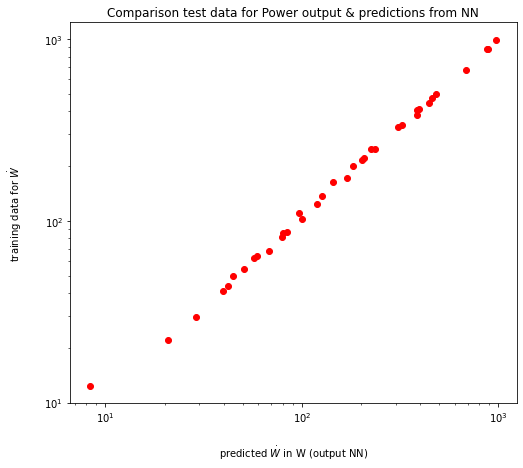

In [559]:
W_data_train = [y_train[i][1]*W_med for i in range(len(y_train))]
W_data_test = [y_test[i][1]*W_med for i in range(len(y_test))]
W_pred = [y_pred[i][1]*W_med for i in range(len(y_pred))]

W_data_train_norm = [y_train[i][1] for i in range(len(y_train))]
W_pred_norm = [y_pred[i][1] for i in range(len(y_pred))]

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(W_pred, W_data_train, c='r', label='Power output')
plt.title('Comparison test data for Power output & predictions from NN')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"training data for $\dot{W}$")
plt.loglog()
plt.show()

In [560]:
P_mae_e = mae(W_data_train_norm, W_pred_norm)
print('MAE for Power predictions =', P_mae_e)

MAE for Power predictions = 0.05123184537445569


### 2.2 - f)

In [561]:
#Getting the predicted power by the model:
y_pred = []
for i in range(len(x_test)):
    xrow = [[x_test[i][0] , x_test[i][1] , x_test[i][2], x_test[i][3]]]
    out = model4.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )

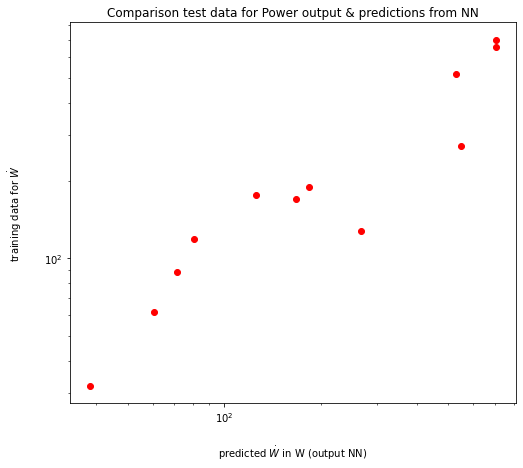

In [564]:
W_data_test = [y_test[i][1]*W_med for i in range(len(y_test))]
W_pred = [y_pred[i][1]*W_med for i in range(len(y_pred))]

W_data_test_norm = [y_test[i][1] for i in range(len(y_test))]
W_pred_norm = [y_pred[i][1] for i in range(len(y_pred))]

#Plotting with log-log scale
plt.figure(figsize=(8,7))
plt.scatter(W_pred, W_data_test, c='r', label='Power output')
plt.title('Comparison test data for Power output & predictions from NN')
plt.xlabel(r"predicted $\dot{W}$ in W (output NN)")
plt.ylabel(r"training data for $\dot{W}$")
plt.loglog()
plt.show()

In [566]:
P_mae_f = mae(W_data_test_norm, W_pred_norm)

print('MAE for Power predictions validation set =', P_mae_f)

MAE for Power predictions validation set = 0.28927354869216787


### 2.2 - g)

In [597]:
####Trying to predict the number of mode using model3
xdata = [[10.0, 200.0, 50.], 
 [20.0, 200.0, 130.], 
 [10.0, 500.0, 40.], 
 [20.0, 500.0, 80.], 
 [20.0, 700.0, 30.], 
 [20.0, 700.0, 55.], 
 [10.0, 1000.0, 12.], 
 [20.0, 1000.0, 25.], 
 [20.0, 1000.0, 39.]]
x_median = np.median(xdata, 0)
T_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
ID_med = x_median[1]
RL_med = x_median[2]
print('median of each input:', x_median)
x_norm = xdata/x_median

y_pred = []
for i in range(len(x_norm)):
    xrow = [[x_norm[i][0] , x_norm[i][1] , x_norm[i][2]]]
    out = model3.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )

W_pred_norm_i = [y_pred[i][2] for i in range(len(y_pred))]
M_pred_norm = [y_pred[i][0] for i in range(len(y_pred))]
print(W_pred_norm_i)

median of each input: [ 20. 700.  40.]
[0.24766931, 0.28150275, 0.74052393, 0.8595562, 1.1541749, 1.144624, 1.6238608, 1.7424755, 1.7308004]


In [593]:
test_M = [M_pred_norm[i] * M_med for i in range(len(M_pred_norm))]
test_M2 = [round(M_pred_norm[i] * M_med) for i in range(len(M_pred_norm))]
test_W = [W_pred_norm_i[i] * W_med for i in range(len(M_pred_norm))]

print('Normalized predictions for M:', M_pred_norm)
print('Approximate predictions for M:', test_M)
print('Approximate predictions for M:', test_M2)
print('Normalized predictions for W:', W_pred_norm)
print('Approximate predictions for W:', test_W)

Normalized predictions for M: [0.5612849, 1.011731, 0.86836237, 1.0017418, 0.8583418, 1.0278671, 0.54082614, 0.84962314, 0.99078053]
Approximate predictions for M: [1.1225697994232178, 2.0234620571136475, 1.7367247343063354, 2.003483533859253, 1.7166836261749268, 2.055734157562256, 1.081652283668518, 1.6992462873458862, 1.9815610647201538]
Approximate predictions for M: [1, 2, 2, 2, 2, 2, 1, 2, 2]
Normalized predictions for W: [0.5089291, 0.44946796, 1.8640856, 1.0424148, 3.061146, 1.4806819, 1.2872753, 4.069803, 2.1440907]
Approximate predictions for W: [42.24000071436167, 48.0102946087718, 126.2963570058346, 146.597309589386, 196.84453327059748, 195.215622317791, 276.949465584755, 297.1791981697083, 295.1880065560341]


### ii)

In [599]:
xdatah = np.column_stack((test_M2, xdata))    
print('Input data 2nd model:')
print(xdatah)
x_median = np.median(xdatah, 0)
M_med = x_median[0] ###Median for the first input: Outside air Temperature Tair
T_med = x_median[1]
ID_med = x_median[2]
RL_med = x_median[3]
print('Median of each input:', x_median)
x_norm = xdatah/x_median

y_pred = []
for i in range(len(x_norm)):
    xrow = [[x_norm[i][0] , x_norm[i][1] , x_norm[i][2], x_norm[i][3]]]
    out = model4.predict(np.array(xrow))
    y_pred.append(out) 
y_pred = np.concatenate(y_pred, axis=0 )

W_pred_norm_ii = [y_pred[i][1] for i in range(len(y_pred))]
print(W_pred_norm)

Input data 2nd model:
[[   1.   10.  200.   50.]
 [   2.   20.  200.  130.]
 [   2.   10.  500.   40.]
 [   2.   20.  500.   80.]
 [   2.   20.  700.   30.]
 [   2.   20.  700.   55.]
 [   1.   10. 1000.   12.]
 [   2.   20. 1000.   25.]
 [   2.   20. 1000.   39.]]
Median of each input: [  2.  20. 700.  40.]
[0.5089291, 0.44946796, 1.8640856, 1.0424148, 3.061146, 1.4806819, 1.2872753, 4.069803, 2.1440907]


In [600]:
P_mae_ii = mae(W_pred_norm_i, W_pred_norm_ii)
print(W_pred_norm_i)
print(W_pred_norm_ii)
print('MAE for Power predictions validation set =', P_mae_e)

[0.24766931, 0.28150275, 0.74052393, 0.8595562, 1.1541749, 1.144624, 1.6238608, 1.7424755, 1.7308004]
[0.5089291, 0.44946796, 1.8640856, 1.0424148, 3.061146, 1.4806819, 1.2872753, 4.069803, 2.1440907]
MAE for Power predictions validation set = 0.05123184537445569
